In [9]:
import json

# 文件路径列表
file_paths = [
    ("AAT.json", r"./【AiDLab】A100/AAT/label/AAT.json"),
    ("LAT.json", r"./【AiDLab】A100/LAT/label/LAT.json")
]

# 用于存储所有的 answers 和 questions
all_answers = []
all_questions = []

# 遍历文件路径，加载并提取每个文件中的标签
for file_name, file_path in file_paths:
    # 加载 JSON 文件
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # 顺序提取 answers 和 questions，并添加到对应列表中
    for item in data:
        all_answers.extend(item.get('answers', []))
        all_questions.extend(item.get('question', []))

# 打印汇总后的标签数量
print(f"总共提取到 {len(all_answers)} 个 answers 标签。")
print(f"总共提取到 {len(all_questions)} 个 questions 标签。")
print()

# 打印汇总后的标签
print("提取到的所有 answers 标签：")
for answer in all_answers:
    print(f"  - {answer}")

print("\n提取到的所有 questions 标签：")
for question in all_questions:
    print(f"  - {question}")


总共提取到 1000 个 answers 标签。
总共提取到 830 个 questions 标签。

提取到的所有 answers 标签：
  - Shoes/Heels_001A03
  - Shoes/Heels_001A01
  - Shoes/Heels_001A02
  - Shoes/Heels_001A04
  - Shoes/Heels_001A10
  - Bags/Shoulder_002A10
  - Bags/Shoulder_002A02
  - Bags/Shoulder_002A01
  - Bags/Shoulder_002A03
  - Bags/Shoulder_002A04
  - Clothings/Tops_003A01
  - Clothings/Tops_003A02
  - Clothings/Tops_003A10
  - Clothings/Tops_003A03
  - Clothings/Tops_003A04
  - Shoes/Mules_004A02
  - Shoes/Mules_004A10
  - Shoes/Mules_004A01
  - Shoes/Mules_004A03
  - Shoes/Mules_004A04
  - Clothings/Tops_005A01
  - Clothings/Tops_005A02
  - Clothings/Tops_005A10
  - Clothings/Tops_005A03
  - Clothings/Tops_005A04
  - Accessories/Earrings_006A10
  - Accessories/Earrings_006A01
  - Accessories/Earrings_006A04
  - Accessories/Earrings_006A03
  - Accessories/Earrings_006A02
  - Shoes/Sandals_007A02
  - Shoes/Sandals_007A01
  - Shoes/Sandals_007A04
  - Shoes/Sandals_007A03
  - Shoes/Sandals_007A10
  - Shoes/Boots_008A04
  - Sh

In [10]:
import json
import re

# 文件路径列表
file_paths = [
    ("AAT.json", r"./【AiDLab】A100/AAT/label/AAT.json"),
    ("LAT.json", r"./【AiDLab】A100/LAT/label/LAT.json")
]

# 用于存储文件名与标签的字典
filename_to_label = {}

# 正则表达式提取 AAT 和 LAT 格式的编号
pattern_aat = re.compile(r'(\d{3}A\d{2})')  # AAT 格式，例如 "001A01"
pattern_lat = re.compile(r'P\d{8}')         # LAT 格式，例如 "P00447524"

# 遍历文件路径，加载并提取每个文件中的标签
for file_name, file_path in file_paths:
    # 加载 JSON 文件
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # 处理 AAT 和 LAT 文件
    for item in data:
        answers = item.get('answers', [])
        questions = item.get('question', [])
        
        # 合并 answers 和 questions 标签
        for label in answers + questions:
            # 匹配 AAT 格式编号
            match_aat = pattern_aat.search(label)
            if match_aat:
                file_id = match_aat.group(1)  # 提取编号部分，例如 "001A01"
                filename_to_label[file_id] = label  # 将编号映射到标签
            
            # 匹配 LAT 格式编号
            match_lat = pattern_lat.search(label)
            if match_lat:
                file_id = match_lat.group(0)  # 提取编号部分，例如 "P00447524"
                filename_to_label[file_id] = label  # 将编号映射到标签

print(f'字典个数{len(filename_to_label)}')
print()
# 输出结果示例
for filename, label in filename_to_label.items():
    print(f"{filename}.jpg: {label}")


字典个数1180

001A03.jpg: Shoes/Heels_001A03
001A01.jpg: Shoes/Heels_001A01
001A02.jpg: Shoes/Heels_001A02
001A04.jpg: Shoes/Heels_001A04
001A10.jpg: Shoes/Heels_001A10
002A10.jpg: Bags/Shoulder_002A10
002A02.jpg: Bags/Shoulder_002A02
002A01.jpg: Bags/Shoulder_002A01
002A03.jpg: Bags/Shoulder_002A03
002A04.jpg: Bags/Shoulder_002A04
003A01.jpg: Clothings/Tops_003A01
003A02.jpg: Clothings/Tops_003A02
003A10.jpg: Clothings/Tops_003A10
003A03.jpg: Clothings/Tops_003A03
003A04.jpg: Clothings/Tops_003A04
004A02.jpg: Shoes/Mules_004A02
004A10.jpg: Shoes/Mules_004A10
004A01.jpg: Shoes/Mules_004A01
004A03.jpg: Shoes/Mules_004A03
004A04.jpg: Shoes/Mules_004A04
005A01.jpg: Clothings/Tops_005A01
005A02.jpg: Clothings/Tops_005A02
005A10.jpg: Clothings/Tops_005A10
005A03.jpg: Clothings/Tops_005A03
005A04.jpg: Clothings/Tops_005A04
006A10.jpg: Accessories/Earrings_006A10
006A01.jpg: Accessories/Earrings_006A01
006A04.jpg: Accessories/Earrings_006A04
006A03.jpg: Accessories/Earrings_006A03
006A02.jpg: Acc

In [11]:
import json

# 文件路径列表
file_paths = [
    ("AAT.json", r"./【AiDLab】A100/AAT/label/AAT.json"),
    ("LAT.json", r"./【AiDLab】A100/LAT/label/LAT.json")
]

# 类别映射字典，将标签映射为四大类
category_mapping = {
    'Shoes': 'shoes',
    'Top': 'clothings',
    'Pants': 'clothings',
    'Skirt': 'clothings',
    'Dress': 'clothings',
    'Outwear': 'clothings',
    'Earing': 'accessories',
    'Bracelet': 'accessories',
    'Watches': 'accessories',
    'Hat': 'accessories',
    'Neckline': 'accessories',
    'Sunglasses': 'accessories',
    'Bags': 'bags'
}

# 用于存储主类别的集合
main_categories = set()

# 遍历文件路径，加载并提取主类别
for file_name, file_path in file_paths:
    # 加载 JSON 文件
    with open(file_path, 'r') as f:
        data = json.load(f)

    # 提取 answers 和 questions 中的主类别
    for item in data:
        answers = item.get('answers', [])
        questions = item.get('question', [])
        
        # 合并 answers 和 questions 标签
        for label in answers + questions:
            if "AAT" in file_name:
                # 对 AAT 标签格式进行处理，取主类别部分
                main_category = label.split('/')[0].lower()  # 转换为小写
            elif "LAT" in file_name:
                # 对 LAT 标签格式进行处理，取前缀并通过字典映射
                main_category = label.split('_')[0]
                main_category = category_mapping.get(main_category, None)

                # 如果映射成功，将类别转换为小写
                if main_category:
                    main_category = main_category.lower()

            # 如果主类别存在，将其添加到集合中
            if main_category:
                main_categories.add(main_category)

# 将主类别集合转换为有序列表
labellist = sorted(list(main_categories))

# 输出主类别种类数和类别名称
print(f"主类别总数: {len(main_categories)}")
print("主类别列表:", labellist)


主类别总数: 4
主类别列表: ['accessories', 'bags', 'clothings', 'shoes']


这张图片对应的标签是 accessories


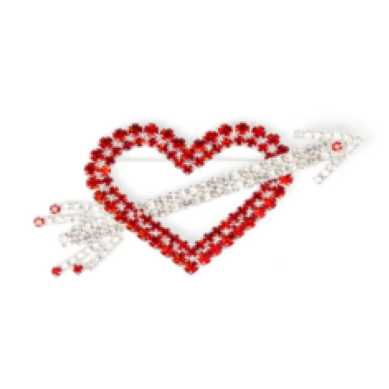

In [12]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import random
import json
import os

# 定义图像转换
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.ToTensor()           # 转换为 Tensor
])

# 统一的类别映射列表，保证 AAT 和 LAT 数据集的一致性
labellist = ['shoes', 'clothing', 'bags', 'accessories']

# 类别映射字典，将 LAT 标签映射到四大类
category_mapping = {
    'Shoes': 'shoes',
    'Top': 'clothing',
    'Pants': 'clothing',
    'Skirt': 'clothing',
    'Dress': 'clothing',
    'Outwear': 'clothing',
    'Earing': 'accessories',
    'Bracelet': 'accessories',
    'Watches': 'accessories',
    'Hat': 'accessories',
    'Neckline': 'accessories',
    'Sunglasses': 'accessories',
    'Bags': 'bags'
}

# 自定义数据集类，包含 AAT 和 LAT 数据集
class FashionDataset(Dataset):
    def __init__(self, images_dirs, json_paths, transform=None):
        self.images_dirs = images_dirs
        self.transform = transform
        self.data = []

        # 加载 AAT 和 LAT 数据
        for images_dir, json_path in zip(images_dirs, json_paths):
            with open(json_path, 'r') as f:
                json_data = json.load(f)
                for item in json_data:
                    # 提取 answers 标签和 image ID
                    answers = item.get('answers', [])
                    if not answers:
                        continue
                    label_str = answers[0]  # 取第一个作为标签
                    
                    # 判断是否为 AAT 或 LAT，并提取标签
                    if 'AAT' in json_path:
                        main_category = label_str.split('/')[0].lower()
                    elif 'LAT' in json_path:
                        main_category = label_str.split('_')[0]
                        main_category = category_mapping.get(main_category, '').lower()

                    # 如果主类别存在于映射列表，则添加到数据集中
                    if main_category in labellist:
                        image_id = label_str.split('_')[-1] + ".jpg"  # 获取文件名
                        img_path = os.path.join(images_dir, image_id)
                        self.data.append((img_path, main_category))

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_path, main_category = self.data[idx]
        label = labellist.index(main_category)  # 将主类别转为索引

        # 读取图像
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        
        return image, label

# 数据加载，处理 AAT 和 LAT 文件夹
images_dirs = [
    "./【AiDLab】A100/AAT/image",  # 修改为 AAT 图片文件夹路径
    "./【AiDLab】A100/LAT/image"   # 修改为 LAT 图片文件夹路径
]
json_paths = [
    "./【AiDLab】A100/AAT/label/AAT.json",  # 修改为 AAT JSON 文件路径
    "./【AiDLab】A100/LAT/label/LAT.json"   # 修改为 LAT JSON 文件路径
]
dataset = FashionDataset(images_dirs, json_paths, transform=transform)

# 划分数据集为训练集、验证集和测试集，比例为 6:2:2
total_size = len(dataset)
train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 创建 DataLoader
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 获取一个批次的数据
image_batch, label_batch = next(iter(trainloader))

# 随机选择一个索引
index = random.randint(0, len(image_batch) - 1)

# 显示图像和标签
imagedemo = image_batch[index]
imagedemolabel = label_batch[index]

# 转换为可显示格式
imagedemo = imagedemo.permute(1, 2, 0)  # 从 (C, H, W) 转换为 (H, W, C)

plt.imshow(imagedemo)
plt.axis('off')  # 关闭坐标轴

print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')


In [13]:
# 获取一个批次的数据
images, labels = next(iter(trainloader))

# 打印图像的形状
print(f"图像的形状: {images.shape}")

# 打印标签的内容
print(f"标签的内容: {labels}")



图像的形状: torch.Size([64, 3, 224, 224])
标签的内容: tensor([2, 0, 0, 1, 3, 2, 2, 3, 3, 0, 0, 1, 0, 1, 3, 1, 1, 1, 3, 0, 2, 2, 3, 2,
        1, 3, 0, 3, 3, 2, 1, 2, 2, 1, 2, 2, 3, 1, 3, 3, 0, 1, 3, 3, 0, 1, 1, 3,
        2, 3, 1, 1, 2, 1, 2, 1, 3, 0, 1, 1, 0, 1, 1, 1])


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# 定义模型的函数
def create_model(num_classes):
    model = models.resnet18(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, num_classes)  # 输出层与类别数相同
    return model

# 创建模型
labellist = ['shoes', 'clothing', 'bags', 'accessories']  # 手动定义类别列表
model = create_model(len(labellist))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# 训练循环
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # 计算平均损失
    epoch_loss = running_loss / len(trainloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # 验证模型
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    # 使用 sklearn 计算准确率
    val_accuracy = accuracy_score(all_labels, all_preds)
    print(f"Validation Accuracy: {val_accuracy:.2f}")

    scheduler.step()

# 保存模型
torch.save(model.state_dict(), 'resnet_fashion_model.pth')
print("Model saved as resnet_fashion_model.pth")

# 测试模型
model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# 使用 sklearn 计算测试集准确率
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {test_accuracy:.2f}")

# 计算混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/20, Loss: 1.1176
Validation Accuracy: 0.69
Epoch 2/20, Loss: 0.1218
Validation Accuracy: 0.54
Epoch 3/20, Loss: 0.0925
Validation Accuracy: 0.69
Epoch 4/20, Loss: 0.0178
Validation Accuracy: 0.66
Epoch 5/20, Loss: 0.0436
Validation Accuracy: 0.71
Epoch 6/20, Loss: 0.0373
Validation Accuracy: 0.71
Epoch 7/20, Loss: 0.0111
Validation Accuracy: 0.71
Epoch 8/20, Loss: 0.0468
Validation Accuracy: 0.74
Epoch 9/20, Loss: 0.0061
Validation Accuracy: 0.80
Epoch 10/20, Loss: 0.0050
Validation Accuracy: 0.86
Epoch 11/20, Loss: 0.0032
Validation Accuracy: 0.86
Epoch 12/20, Loss: 0.0028
Validation Accuracy: 0.89
Epoch 13/20, Loss: 0.0038
Validation Accuracy: 0.89
Epoch 14/20, Loss: 0.0024
Validation Accuracy: 0.91
Epoch 15/20, Loss: 0.0025
Validation Accuracy: 0.89
Epoch 16/20, Loss: 0.0026
Validation Accuracy: 0.91
Epoch 17/20, Loss: 0.0057
Validation Accuracy: 0.91
Epoch 18/20, Loss: 0.0047
Validation Accuracy: 0.91
Epoch 19/20, Loss: 0.0025
Validation Accuracy: 0.91
Epoch 20/20, Loss: 0.

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


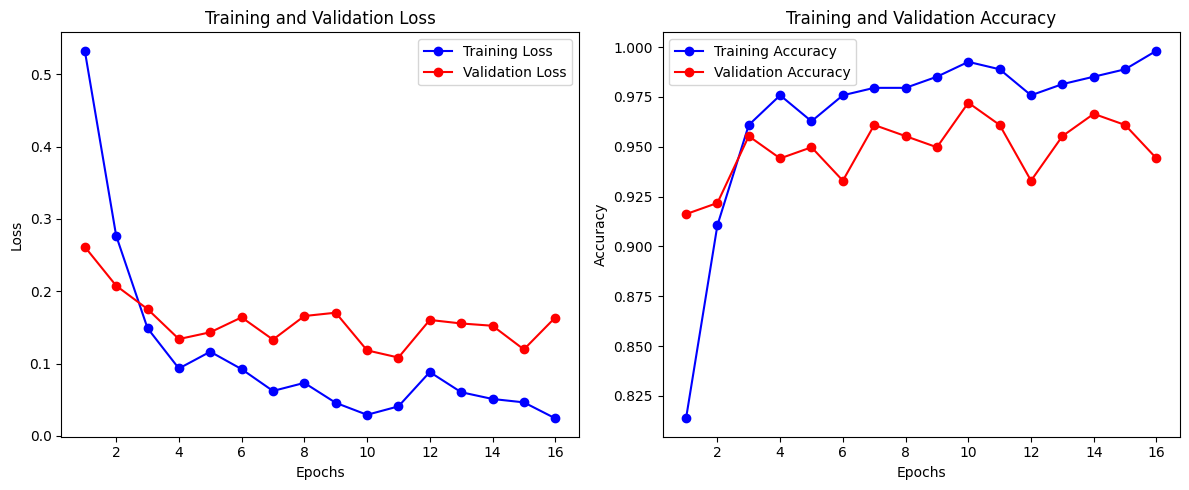

Classification Report:
              precision    recall  f1-score   support

 accessories       0.95      0.95      0.95        19
        bags       0.94      0.96      0.95        46
    clothing       1.00      0.95      0.97        73
       shoes       0.93      1.00      0.96        41

    accuracy                           0.96       179
   macro avg       0.95      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179



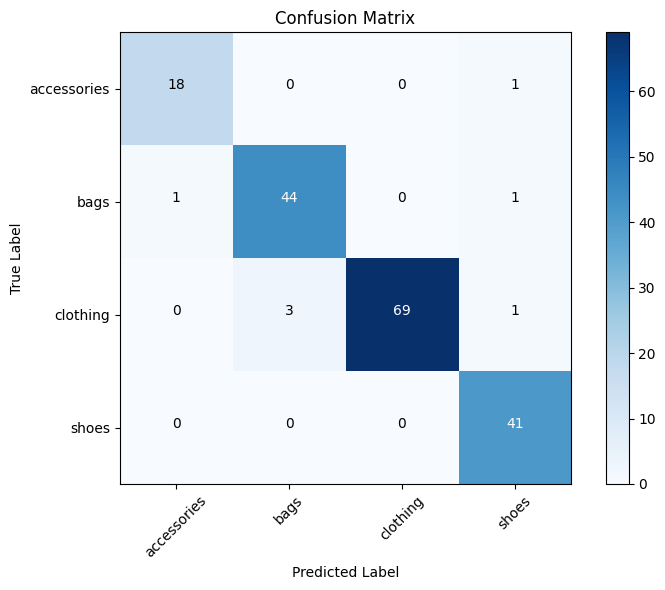

In [16]:
import json
import re
from PIL import Image
import os
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Step 1: Data Preprocessing and Loading
class FashionDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image_path = self.dataset[idx]['image']
        label = self.dataset[idx]['label']
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Step 2: Create Model Function
def create_resnet18_model(num_classes):
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers
    # Unfreeze the last layer
    for param in model.layer4.parameters():
        param.requires_grad = True
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model

# Step 3: Training, Validation, and Evaluation Functions
def train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=None, num_epochs=50, patience=5):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    early_stopping_counter = 0
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                data_loader = train_loader
            else:
                model.eval()
                data_loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())
                if scheduler is not None:
                    scheduler.step(epoch_loss)
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    early_stopping_counter = 0
                    best_model_wts = model.state_dict()
                else:
                    early_stopping_counter += 1
                    if early_stopping_counter >= patience:
                        model.load_state_dict(best_model_wts)
                        plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
                        return model

    model.load_state_dict(best_model_wts)
    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    return model

def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Step 4: Main Function to Train and Evaluate the Model
def main():
    # Load and preprocess data
    datasets = []
    file_paths = [
        ('./【AiDLab】A100/AAT/label/AAT.json', './【AiDLab】A100/AAT/image'),
        ('./【AiDLab】A100/LAT/label/LAT.json', './【AiDLab】A100/LAT/image')
    ]
    pattern_aat = re.compile(r'(\d{3}A\d{2})')  # AAT 格式，例如 "001A01"
    pattern_lat = re.compile(r'P\d{8}')          # LAT 格式，例如 "P00447524"

    for json_path, image_dir in file_paths:
        with open(json_path, 'r') as f:
            data = json.load(f)
        all_items = []
        for entry in data:
            all_items.extend(entry['question'])
            all_items.extend(entry['answers'])
        items = []
        for label in all_items:
            if 'AAT' in json_path:
                match_aat = pattern_aat.search(label)
                if match_aat:
                    category, id_ = label.split('/')
                    items.append({'category': category, 'id': match_aat.group(1)})
            elif 'LAT' in json_path:
                match_lat = pattern_lat.search(label)
                if match_lat:
                    category, id_ = label.split('_')
                    items.append({'category': category, 'id': match_lat.group(0)})
        unique_items = {(item['category'], item['id']) for item in items}
        unique_items = [{'category': cat, 'id': id_} for cat, id_ in unique_items]
        category_mapping = {
            'Shoes': 'shoes',
            'Top': 'clothing',
            'Pants': 'clothing',
            'Skirt': 'clothing',
            'Dress': 'clothing',
            'Outwear': 'clothing',
            'Earing': 'accessories',
            'Bracelet': 'accessories',
            'Watches': 'accessories',
            'Hat': 'accessories',
            'Neckline': 'accessories',
            'Sunglasses': 'accessories',
            'Bags': 'bags'
        }
        for item in unique_items:
            category = item['category']
            id_ = item['id']
            label = category_mapping.get(category)
            if label is None:
                continue
            image_path = os.path.join(image_dir, f"{id_}.jpg")
            if not os.path.exists(image_path):
                continue
            datasets.append({'image': image_path, 'label': label})

    labels = [data['label'] for data in datasets]
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    for idx, data_item in enumerate(datasets):
        data_item['label'] = encoded_labels[idx]
    class_names = label_encoder.classes_

    # Data transformations
    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Create datasets and data loaders
    full_dataset = FashionDataset(datasets, transform=data_transforms)
    train_size = int(0.6 * len(full_dataset))
    val_size = int(0.2 * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

    batch_size = 8
    num_workers = 0
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    # Model, criterion, optimizer, scheduler, and device setup
    num_classes = len(class_names)
    model = create_resnet18_model(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Train and evaluate the model
    model = train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=scheduler, num_epochs=50, patience=5)
    evaluate_model(model, test_loader, device, class_names)

if __name__ == '__main__':
    main()


In [17]:
import json
import re
from PIL import Image
import os
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Step 1: Data Preprocessing and Loading
class FashionDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image_path = self.dataset[idx]['image']
        label = self.dataset[idx]['label']
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Step 2: Create Model Function
def create_resnet18_model(num_classes):
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers
    # Unfreeze the last layer
    for param in model.layer4.parameters():
        param.requires_grad = True
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model

# Step 3: Train, Validate, and Evaluate Functions
def train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=None, num_epochs=50, patience=5):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    early_stopping_counter = 0
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}\n{'-'*10}")

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                data_loader = train_loader
            else:
                model.eval()
                data_loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
                print(f"Training Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.4f}")
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())
                print(f"Validation Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.4f}")
                if scheduler is not None:
                    scheduler.step(epoch_loss)
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    early_stopping_counter = 0
                    best_model_wts = model.state_dict()
                else:
                    early_stopping_counter += 1
                    if early_stopping_counter >= patience:
                        model.load_state_dict(best_model_wts)
                        plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
                        return model

    model.load_state_dict(best_model_wts)
    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    return model

def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Step 4: Main Function to Train and Evaluate the Model
def main():    
    file_paths = [
        ('./【AiDLab】A100/AAT/label/AAT.json', './【AiDLab】A100/AAT/image'),
        ('./【AiDLab】A100/LAT/label/LAT.json', './【AiDLab】A100/LAT/image')
    ]
    pattern_aat = re.compile(r'(\d{3}A\d{2})')  # AAT format, e.g., "001A01"
    pattern_lat = re.compile(r'P\d{8}')          # LAT format, e.g., "P00447524"

    datasets = []
    for json_path, image_dir in file_paths:
        with open(json_path, 'r') as f:
            data = json.load(f)
        all_items = []
        for entry in data:
            all_items.extend(entry['question'])
            all_items.extend(entry['answers'])
        items = []
        for label in all_items:
            if 'AAT' in json_path:
                match_aat = pattern_aat.search(label)
                if match_aat:
                    category, id_ = label.split('/')
                    items.append({'category': category, 'id': match_aat.group(1)})
            elif 'LAT' in json_path:
                match_lat = pattern_lat.search(label)
                if match_lat:
                    category, id_ = label.split('_')
                    items.append({'category': category, 'id': match_lat.group(0)})
        unique_items = {(item['category'], item['id']) for item in items}
        unique_items = [{'category': cat, 'id': id_} for cat, id_ in unique_items]
        for item in unique_items:
            category = item['category']
            id_ = item['id']
            label = category_mapping.get(category.lower())
            if label is None:
                continue
            image_path = os.path.join(image_dir, f"{id_}.jpg")
            if not os.path.exists(image_path):
                continue
            datasets.append({'image': image_path, 'label': label})

    if len(datasets) == 0:
        raise ValueError("No valid data found. Please check your file paths and data formatting.")

    labels = [data['label'] for data in datasets]
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    for idx, data_item in enumerate(datasets):
        data_item['label'] = encoded_labels[idx]
    class_names = label_encoder.classes_

    # Data Transformations
    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Create Dataset and Data Loaders
    full_dataset = FashionDataset(datasets, transform=data_transforms)
    if len(full_dataset) == 0:
        raise ValueError("The dataset is empty. Please verify your data preparation steps.")
    
    train_size = int(0.6 * len(full_dataset))
    val_size = int(0.2 * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

    batch_size = 8
    num_workers = 0
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    # Model, Loss Function, Optimizer, Scheduler, and Device Setup
    num_classes = len(class_names)
    model = create_resnet18_model(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Train and Evaluate the Model
    model = train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=scheduler, num_epochs=50, patience=5)
    evaluate_model(model, test_loader, device, class_names)

if __name__ == '__main__':
    main()


ValueError: No valid data found. Please check your file paths and data formatting.

In [ ]:
import json
import re
from PIL import Image
import os
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Step 1: Data Preprocessing and Loading
class FashionDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image_path = self.dataset[idx]['image']
        label = self.dataset[idx]['label']
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Step 2: Create Model Function
def create_resnet18_model(num_classes):
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers
    # Unfreeze the last layer
    for param in model.layer4.parameters():
        param.requires_grad = True
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model

# Step 3: Training, Validation, and Evaluation Functions
def train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=None, num_epochs=50, patience=5):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    early_stopping_counter = 0
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                data_loader = train_loader
            else:
                model.eval()
                data_loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())
                if scheduler is not None:
                    scheduler.step(epoch_loss)
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    early_stopping_counter = 0
                    best_model_wts = model.state_dict()
                else:
                    early_stopping_counter += 1
                    if early_stopping_counter >= patience:
                        model.load_state_dict(best_model_wts)
                        plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
                        return model

    model.load_state_dict(best_model_wts)
    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    return model

def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Step 4: Main Function to Train and Evaluate the Model
def main():
    # Load and preprocess data
    datasets = []
    file_paths = [
        ('./【AiDLab】A100/AAT/label/AAT.json', './【AiDLab】A100/AAT/image'),
        ('./【AiDLab】A100/LAT/label/LAT.json', './【AiDLab】A100/LAT/image')
    ]
    pattern_aat = re.compile(r'(\d{3}A\d{2})')  # AAT 格式，例如 "001A01"
    pattern_lat = re.compile(r'P\d{8}')          # LAT 格式，例如 "P00447524"

    for json_path, image_dir in file_paths:
        with open(json_path, 'r') as f:
            data = json.load(f)
        all_items = []
        for entry in data:
            all_items.extend(entry['question'])
            all_items.extend(entry['answers'])
        items = []
        for label in all_items:
            if 'AAT' in json_path:
                match_aat = pattern_aat.search(label)
                if match_aat:
                    category, id_ = label.split('/')
                    items.append({'category': category, 'id': match_aat.group(1)})
            elif 'LAT' in json_path:
                match_lat = pattern_lat.search(label)
                if match_lat:
                    category, id_ = label.split('_')
                    items.append({'category': category, 'id': match_lat.group(0)})
        unique_items = {(item['category'], item['id']) for item in items}
        unique_items = [{'category': cat, 'id': id_} for cat, id_ in unique_items]
        category_mapping = {
            'Shoes': 'shoes',
            'Top': 'clothing',
            'Pants': 'clothing',
            'Skirt': 'clothing',
            'Dress': 'clothing',
            'Outwear': 'clothing',
            'Earing': 'accessories',
            'Bracelet': 'accessories',
            'Watches': 'accessories',
            'Hat': 'accessories',
            'Neckline': 'accessories',
            'Sunglasses': 'accessories',
            'Bags': 'bags'
        }
        for item in unique_items:
            category = item['category']
            id_ = item['id']
            label = category_mapping.get(category)
            if label is None:
                continue
            image_path = os.path.join(image_dir, f"{id_}.jpg")
            if not os.path.exists(image_path):
                continue
            datasets.append({'image': image_path, 'label': label})

    labels = [data['label'] for data in datasets]
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    for idx, data_item in enumerate(datasets):
        data_item['label'] = encoded_labels[idx]
    class_names = label_encoder.classes_

    # Data transformations
    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Create datasets and data loaders
    full_dataset = FashionDataset(datasets, transform=data_transforms)
    train_size = int(0.6 * len(full_dataset))
    val_size = int(0.2 * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

    batch_size = 8
    num_workers = 0
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    # Model, criterion, optimizer, scheduler, and device setup
    num_classes = len(class_names)
    model = create_resnet18_model(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Train and evaluate the model
    model = train_model(model, train_loader, val_loader, criterion, optimizer, device, scheduler=scheduler, num_epochs=50, patience=5)
    evaluate_model(model, test_loader, device, class_names)

if __name__ == '__main__':
    main()


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
